# PARTH LANUKIA

# Loading data set

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Seeing whats inside of our dataset

First 10 images in the training set:


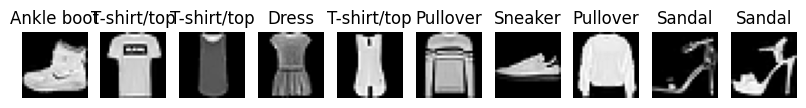

First image in the training set:


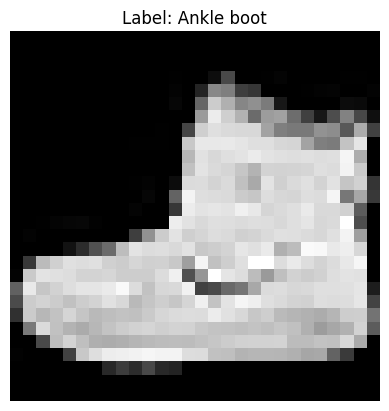

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
Data type of x_train: uint8
Data type of y_train: uint8


In [21]:
import matplotlib.pyplot as plt
#function to plot images
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Class labels in Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#first 10 images from the training set
print("First 10 images in the training set:")
plot_images(x_train, [class_names[label] for label in y_train], num_images=10)

# first image and its corresponding label from the training set
print("First image in the training set:")
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()

# Print the shape and data type of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Data type of x_train: {x_train.dtype}")
print(f"Data type of y_train: {y_train.dtype}")

# Scalling of data

In [22]:
# Scale the pixel values to a range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to fit the input shape expected by the ANN
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# EDA

In [23]:
# Class names in Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


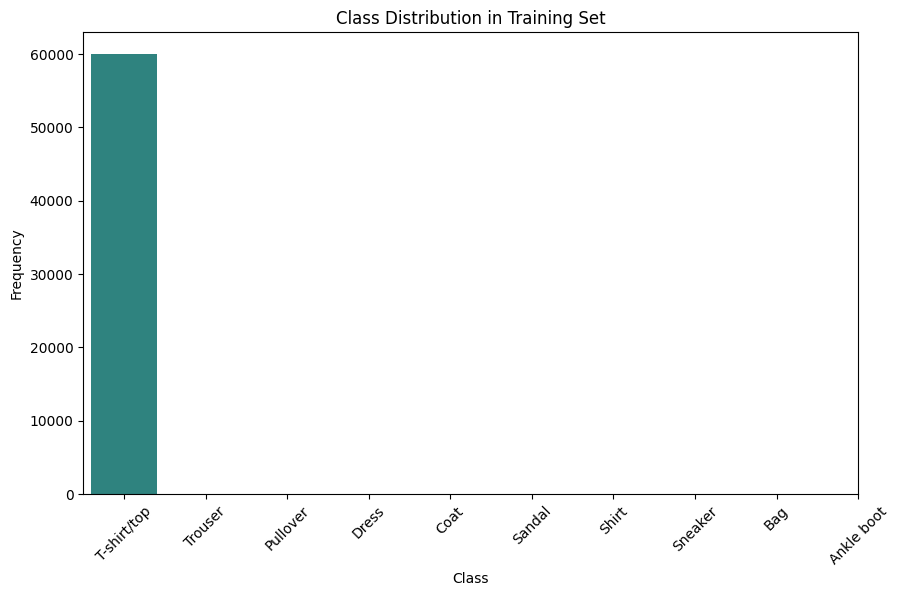

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Class Distribution Plot
plt.figure(figsize=(10, 6))
sns.countplot(y_train, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

In [25]:
#Print Image Shape and Data Type
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Data type of x_train: {x_train.dtype}")
print(f"Data type of y_train: {y_train.dtype}")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
Data type of x_train: float64
Data type of y_train: uint8


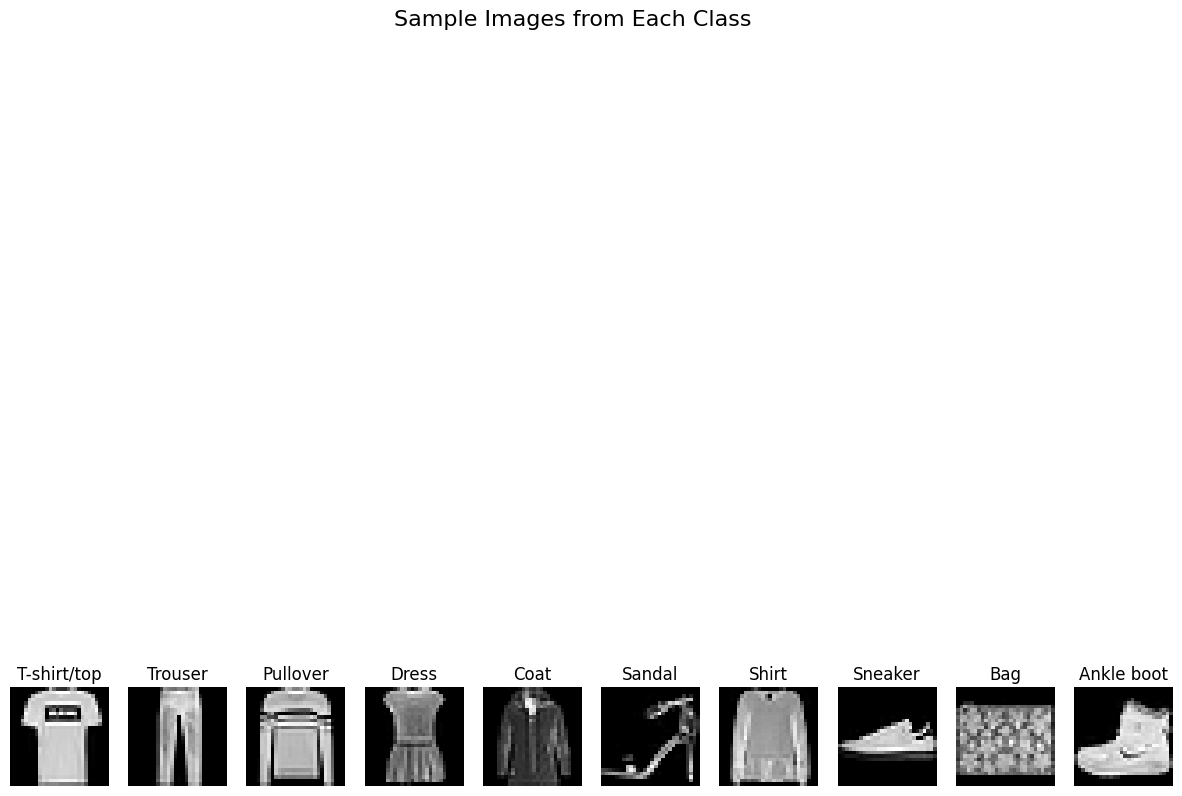

In [26]:
# Sample Images from Each Class
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    idx = np.where(y_train == i)[0][0]
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Sample Images from Each Class', fontsize=16)
plt.show()

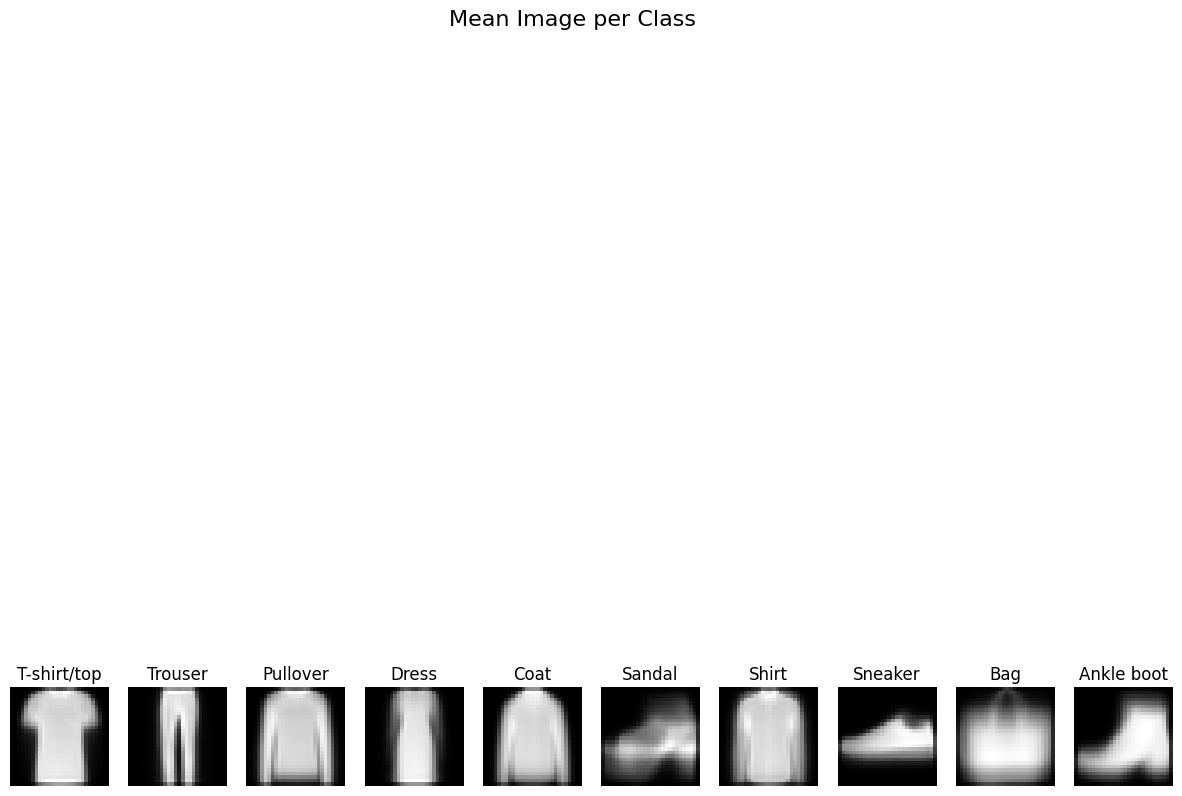

In [27]:
# Mean Image per Class
plt.figure(figsize=(15, 15))
for i in range(10):
    class_images = x_train[y_train == i]
    mean_image = np.mean(class_images, axis=0)
    plt.subplot(1, 10, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Mean Image per Class', fontsize=16)
plt.show()

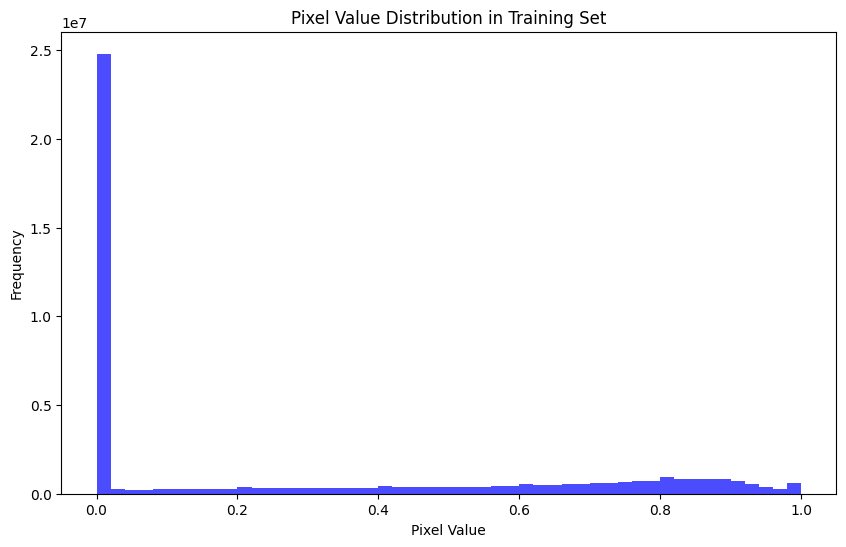

In [28]:
# Pixel Value Distribution
plt.figure(figsize=(10, 6))
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution in Training Set')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Creating Layers

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [33]:
(train_img, train_labels), (test_img,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [34]:
train_img.shape

(60000, 28, 28)

In [35]:
train_labels.shape

(60000,)

In [36]:
test_img.shape

(10000, 28, 28)

In [37]:
test_labels.shape

(10000,)

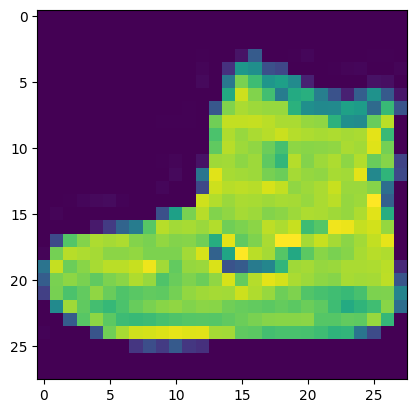

In [38]:
plt.imshow(train_img[0])

In [39]:
train_labels[0]

9

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
class_names[train_labels[0]]

'Ankle boot'

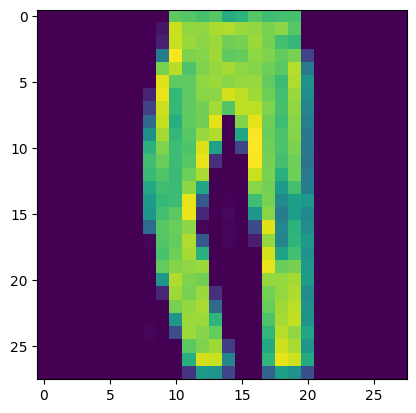

In [42]:
plt.imshow(test_img[5])

In [43]:
print(test_labels[5])
class_names[test_labels[5]]

1


'Trouser'

In [44]:
train_image_scaled = train_img/255
test_img_scaled = test_img/255

In [45]:
train_image_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
len(class_names)

10

In [48]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

train_labels_categorical = keras.utils.to_categorical(
    train_labels, num_classes=11, dtype='float32'
)
train_labels_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

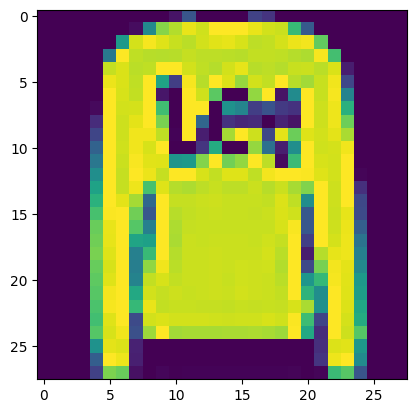

In [49]:
plt.imshow(test_img[1])

In [50]:
class_names[test_labels[1]]

'Pullover'

# Model 1

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(11,activation='sigmoid')
])
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [52]:
model.fit(train_image_scaled , train_labels_categorical, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6864 - accuracy: 0.7754
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4695 - accuracy: 0.8373
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4276 - accuracy: 0.8500
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4007 - accuracy: 0.8587
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3823 - accuracy: 0.8656
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3660 - accuracy: 0.8709
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3521 - accuracy: 0.8766
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3410 - accuracy: 0.8785
Epoch 9/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3301 - accuracy: 0.8824
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - l

In [53]:
model.predict(test_img_scaled)[2]

313/313 [==============================] - 1s 2ms/step


array([9.8721212e-01, 1.0000000e+00, 1.4233483e-01, 7.7480692e-01,
       9.7512931e-01, 1.6870043e-03, 5.6036997e-01, 2.6664583e-02,
       8.8900495e-03, 8.2036981e-04, 6.7117519e-04], dtype=float32)

In [54]:
class_names[test_labels[2]]

'Trouser'

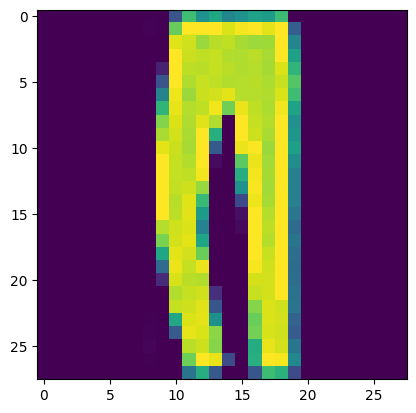

In [55]:
plt.imshow(test_img_scaled[2])

In [56]:
model.evaluate(test_img_scaled, test_label_categorical)

NameError: name 'test_label_categorical' is not defined

# Model 2

In [59]:
# Scale the pixel values to a range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [61]:
import tensorflow as tf

# Define a variable outside tf.function
my_variable = tf.Variable(0.0)

@tf.function
def my_function(x):
    # Use the variable inside tf.function
    return x * my_variable

In [63]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Change to 10 units and softmax activation
])

# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 200)               100200    
                                                                 
 dense_8 (Dense)             (None, 10)                2010      
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.2985 - accuracy: 0.1684 - val_loss: 2.2973 - val_accuracy: 0.2009
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2965 - accuracy: 0.1591 - val_loss: 2.2954 - val_accuracy: 0.1005
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2943 - accuracy: 0.1907 - val_loss: 2.2927 - val_accuracy: 0.2440
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2912 - accuracy: 0.2293 - val_loss: 2.2893 - val_accuracy: 0.1521
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2871 - accuracy: 0.2458 - val_loss: 2.2844 - val_accuracy: 0.1972
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2811 - accuracy: 0.2567 - val_loss: 2.2771 - val_accuracy: 0.2914
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2720 - accuracy: 0.3016 - val_loss: 2.2657 - val_ac

In [65]:
model.predict(test_img_scaled)[2]

313/313 [==============================] - 1s 4ms/step


array([7.1434784e-01, 1.8912804e-04, 4.1929733e-02, 3.8463878e-03,
       2.0911752e-01, 5.7831674e-27, 3.0569442e-02, 4.9893159e-29,
       2.0595861e-17, 2.0119080e-23], dtype=float32)

In [68]:
class_names[test_labels[50]]

'Coat'

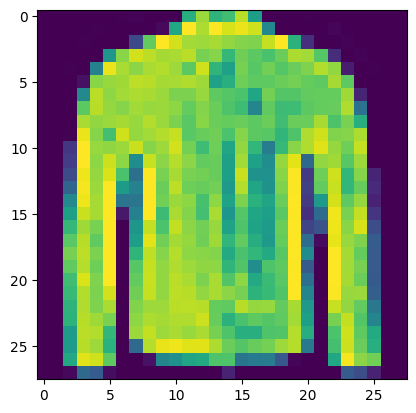

In [69]:
plt.imshow(test_img_scaled[50])

In [70]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


313/313 [==============================] - 1s 4ms/step - loss: 2.1529 - accuracy: 0.4244
Test Loss: 2.1529
Test Accuracy: 0.4244
